# PROJECT ON REGRESSION MODELS -HOUSE PRICE PREDICTION

In [64]:
import os
os.chdir(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data')
os.getcwd()

'C:\\Users\\Reshma\\Desktop\\dmasm\\notebooks\\data'

In [65]:
#Importing pandas and dataset

import pandas as pd
import numpy as np
import seaborn as sns
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data= pd.read_csv('Housing.csv')

In [66]:
df=data.copy()

We are going to use the USA_Housing dataset. Since house price is a continues variable, this is a regression problem. 
The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.

'Avg. Area House Age': Avg Age of Houses in same city

'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city

'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city

'Area Population': Population of city hou se is located in

'Price': Price that the house sold at

'Address': Address for the house

### Getting fimiliar with data

In [67]:
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(data.shape[0],data.shape[1]))

Dataframe Details
Total Rows: 5000
Total Columns: 7


In [68]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


The given dataset has 1 categorical columns and 6 numerical columns

In [69]:
#Checking the head of the dataset
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [70]:
#Checking the tail of the dataset
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [71]:
data.columns   

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [72]:
data.columns=['Avg_Income','Avg_House_Age','Avg_No_of_Rooms','Avg_No_of_Bedrooms','Population','Price','Address']

### MISSING VALUES

In [73]:
data.isnull().sum().sort_values(ascending=False)

Address               0
Price                 0
Population            0
Avg_No_of_Bedrooms    0
Avg_No_of_Rooms       0
Avg_House_Age         0
Avg_Income            0
dtype: int64

It can be seen that there are no missing values in the given dataset

### OUTLIER ANALYSIS

In [ ]:
Potential outliers are observations that lie outside the lower and upper limits. 
Lower limit = Q1 - 1.5 * IQR 
Upper limit = Q3 + 1.5 * IQR

In [ ]:
1)lower inner fence: Q1 - 1.5*IQR
2)upper inner fence: Q3 + 1.5*IQR
3)lower outer fence: Q1 - 3*IQR
4)upper outer fence: Q3 + 3*IQR
Data values that lie between the inner and outer fences are considered possible outliers or potential outliers; 
those that lie outside the outer fences are considered probable outliers or extreme outlier

In [12]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    data_out =data[(data[col]<LIF) | (data[col]>UIF)] # I created a new data set that has just include potential outliers 
    return data_out[col] .describe(),len(data_out)

In [13]:
outlier_analysis('Avg_House_Age')

(count    25.000000
 mean      5.401490
 std       2.972714
 min       2.644304
 25%       3.055370
 50%       3.232059
 75%       8.899713
 max       9.519088
 Name: Avg_House_Age, dtype: float64,
 25)

In [14]:
outlier_analysis('Avg_House_Age')    

(count    25.000000
 mean      5.401490
 std       2.972714
 min       2.644304
 25%       3.055370
 50%       3.232059
 75%       8.899713
 max       9.519088
 Name: Avg_House_Age, dtype: float64,
 25)

In [15]:
outlier_analysis('Population')  

(count       30.000000
 mean     42256.432779
 std      30446.491500
 min        172.610686
 25%       6925.203552
 50%      64165.025507
 75%      67539.408969
 max      69621.713378
 Name: Population, dtype: float64,
 30)

In [16]:
outlier_analysis('Price')   

(count    3.500000e+01
 mean     1.430181e+06
 std      1.037602e+06
 min      1.593866e+04
 25%      2.352549e+05
 50%      2.190339e+06
 75%      2.261678e+06
 max      2.469066e+06
 Name: Price, dtype: float64,
 35)

#### Shuffling Data

In [47]:
# shuffle the dataframe
from sklearn.utils import shuffle
data = shuffle(data, random_state=0)
print(data.head())

        Avg_Income  Avg_House_Age  Avg_No_of_Rooms  Avg_No_of_Bedrooms  \
398   61200.726175       5.299694         6.234615                4.23   
3833  63380.814670       5.344664         6.001574                2.45   
4836  71208.269301       5.300326         6.077989                4.01   
4572  50343.763518       6.027468         5.160240                4.35   
636   54535.453719       5.278065         6.871038                4.41   

        Population          Price  \
398   42789.692217  894251.068636   
3833  40217.333577  932979.360621   
4836  25696.361741  920747.911288   
4572  27445.876739  691854.921027   
636   30852.207006  732733.236293   

                                                Address  
398   45153 Salas Hollow Apt. 148\nWest Erica, SD 93725  
3833  3499 Stuart Plains Suite 304\nAaronhaven, NE 8...  
4836  796 Joshua Forges Suite 834\nBensonside, CA 82761  
4572    400 Allen Lodge Apt. 145\nBernardfort, NV 57316  
636   146 Christopher Lights Suite 182\nNe

In [48]:
data.head()

,Avg_Income,Avg_House_Age,Avg_No_of_Rooms,Avg_No_of_Bedrooms,Population,Price,Address
398,61200.726175,5.299694,6.234615,4.23,42789.692217,894251.068636,"45153 Salas Hollow Apt. 148\nWest Erica, SD 93725"
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,932979.360621,"3499 Stuart Plains Suite 304\nAaronhaven, NE 8..."
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,920747.911288,"796 Joshua Forges Suite 834\nBensonside, CA 82761"
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,691854.921027,"400 Allen Lodge Apt. 145\nBernardfort, NV 57316"
636,54535.453719,5.278065,6.871038,4.41,30852.207006,732733.236293,146 Christopher Lights Suite 182\nNew Kathysid...


In [49]:
df1= data.copy()
df1.to_csv("new_dflr_try.csv")

### Visualising the numeric variables

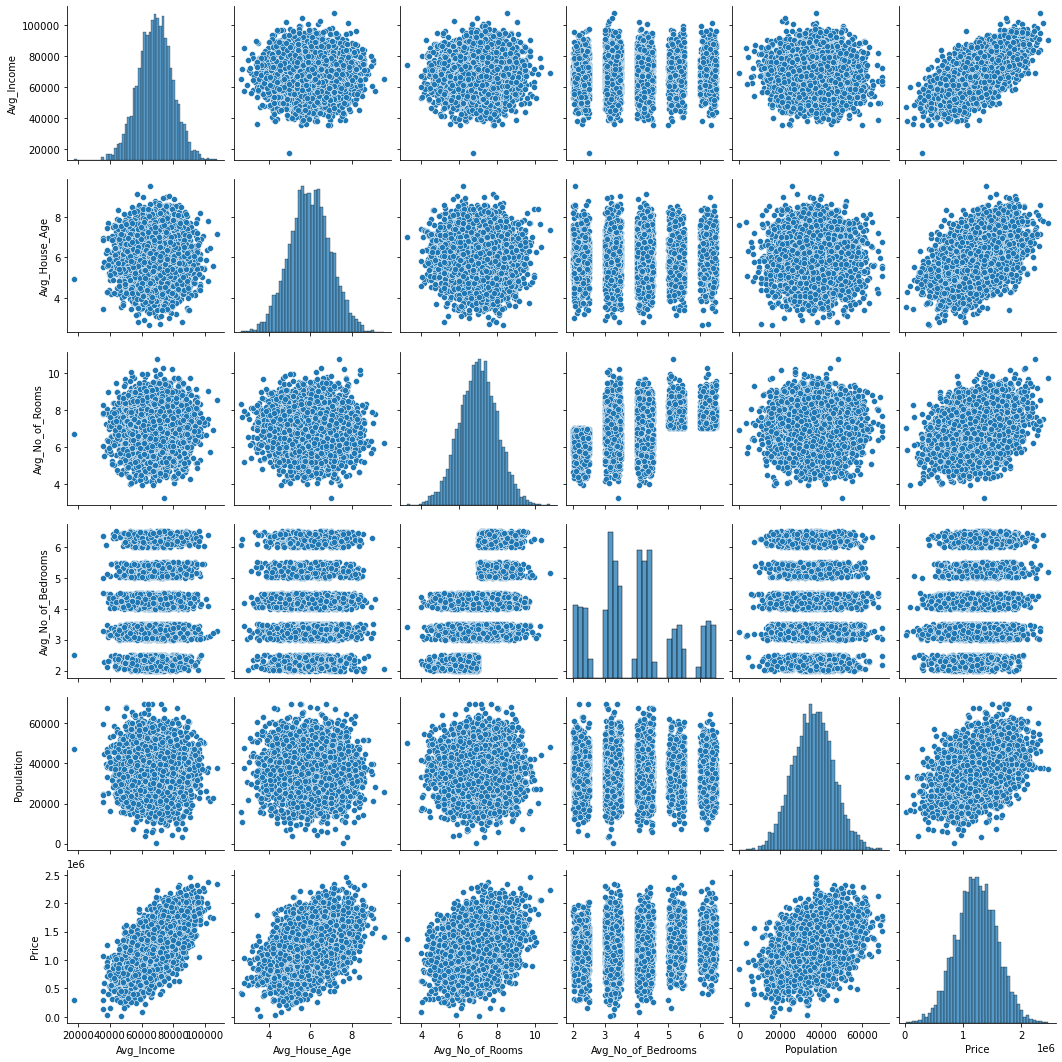

In [50]:
# Pairplot of all the numeric variables
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data=data)
plt.show()

### CORRELATION

In [51]:
print(data.corr())

                    Avg_Income  Avg_House_Age  Avg_No_of_Rooms  \
Avg_Income            1.000000      -0.002007        -0.011032   
Avg_House_Age        -0.002007       1.000000        -0.009428   
Avg_No_of_Rooms      -0.011032      -0.009428         1.000000   
Avg_No_of_Bedrooms    0.019788       0.006149         0.462695   
Population           -0.016234      -0.018743         0.002040   
Price                 0.639734       0.452543         0.335664   

                    Avg_No_of_Bedrooms  Population     Price  
Avg_Income                    0.019788   -0.016234  0.639734  
Avg_House_Age                 0.006149   -0.018743  0.452543  
Avg_No_of_Rooms               0.462695    0.002040  0.335664  
Avg_No_of_Bedrooms            1.000000   -0.022168  0.171071  
Population                   -0.022168    1.000000  0.408556  
Price                         0.171071    0.408556  1.000000  


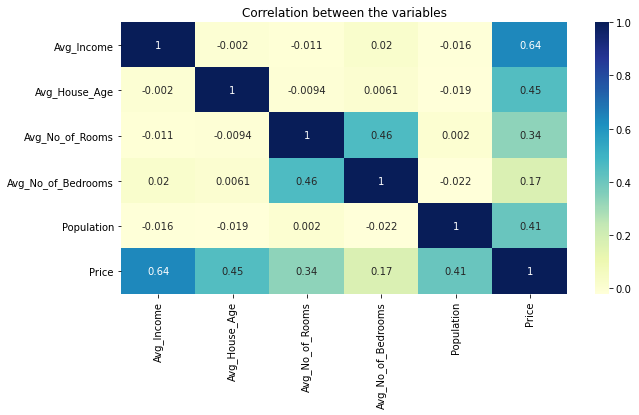

In [52]:
# Heatmap to visualise the correlation between the variables

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation between the variables")
plt.show()

Some variables(Avg no: of bedrroms,Avg.no of rooms) shows very strong correlation between each other

## Multiple Linear Regression

### Dividing into features and target variable

In [74]:
#Packaging the independent variables into X Dataframe
X= data.drop(['Price','Address'],axis=1)
#Packaging the independent variables into y Dataframe
y= data.Price
X1=X.copy()
y1=y.copy()

In [75]:
X.head()

,Avg_Income,Avg_House_Age,Avg_No_of_Rooms,Avg_No_of_Bedrooms,Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [76]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### OLS

StatsModel API helps to create a linear regression model as it gives a comprehensive report of how good a fit your linear regression model is.

In [77]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.params)
print(lr.summary())

const                -2.637299e+06
Avg_Income            2.157805e+01
Avg_House_Age         1.656370e+05
Avg_No_of_Rooms       1.206599e+05
Avg_No_of_Bedrooms    1.651139e+03
Population            1.520074e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        08:10:59   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                           

##### INTERPRETATION:
Here we can see that for Avg_No_of_Bedrooms has p value greater tan .05 which need to be fixed .For that we will do backward feature elimination.

In [78]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.params)
print(lr.summary())

const             -2.637561e+06
Avg_Income         2.158274e+01
Avg_House_Age      1.656579e+05
Avg_No_of_Rooms    1.215982e+05
Population         1.519612e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        08:11:00   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std e

##### INTERPRETATION:
After backward feature elimination though the p values became negative,it shows a note that the condition number is large, 9.4e+05. This might indicate that there are strong multicollinearity or other numerical problems.

#### Principal component analysis (PCA)
It is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
#X_test_scaled = pd.DataFrame(sc.transform(x_test1),columns=X.columns)

In [80]:
'''
PCA uses Singular Value Decomposition to calculate 
new features that help discrimate based on their differences
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_scaled)

PCA(n_components=5)

### Spliting Dataset into train and test data

In [81]:
#the new features (principal components) do not have much 
#physical interpretation as the original features 
#but are calculated/derived using the original features 
X_pca = pd.DataFrame(pca.transform(X_scaled),columns=X.columns)
X_pca.head()

,Avg_Income,Avg_House_Age,Avg_No_of_Rooms,Avg_No_of_Bedrooms,Population
0,0.134321,-1.260688,0.960900,0.598668,0.038365
1,-0.689432,-0.187917,0.740211,-0.750046,0.362484
2,1.717200,0.497438,-0.470993,0.304919,0.375500
3,-1.403004,-0.615338,-1.146205,-0.280401,-0.558175
4,0.762992,0.208715,-0.008184,1.570795,0.430561


#### OLS

In [82]:
import statsmodels.api as sm
X2 = sm.add_constant(X_pca) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.params)
print(lr.summary())

const                 1.232073e+06
Avg_Income            8.514684e+04
Avg_House_Age        -7.742830e+04
Avg_No_of_Rooms       6.267004e+04
Avg_No_of_Bedrooms   -3.024545e+05
Population            9.317422e+04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        08:11:07   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                           

In [244]:
from sklearn.model_selection import train_test_split
#we do not need the constant cloumn for the linear regression mdel so we need to drop that from dataset X2.
X2 = X2.drop(['const'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(X2, y, test_size = 0.2 , random_state =0)

#### Linear Regression Model Training

In [245]:
from sklearn.linear_model import LinearRegression
#Create Model & Fit

lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [246]:
print("Intercept : " , lr.intercept_)#B0
print("Slope : " , lr.coef_)#B1

Intercept :  -2651877.725336885
Slope :  [2.16360723e+01 1.65681743e+05 1.23337548e+05 1.51573070e+01]


In [247]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=5).mean()

0.9173932042570758

#### Prediction

In [248]:
y_pred = lr.predict(x_test)
y_pred_data = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_data = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_data , y_pred_data] , axis=1)

,Real Values,Predicted Values
0,1.062206e+06,1.156719e+06
1,5.557557e+05,6.576112e+05
2,1.069828e+06,1.162284e+06
3,7.992077e+05,6.797402e+05
4,1.199760e+06,1.220796e+06
...,...,...
995,1.173695e+06,1.122363e+06
996,9.920531e+05,1.015123e+06
997,8.341856e+05,8.516335e+05
998,1.048801e+06,1.173373e+06


In [249]:
n=len(x_test)
k=len(x_test.iloc[0])

In [252]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
lr_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
lr_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
lr_mae=mae
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
lr_mse=mse
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse=rmse
print("rmse : {}".format(rmse))


R2 Score : 0.9183670196455628
Adj_R2 : 0.9180388468602183
Model Accuracy: 91.83670196455628%
mae : 80122.90464621106
mse : 10007075263.71332
rmse : 100035.37006335969


## INTERPRETATION

R2Score and Adj_R2,which are close to 1  shows our model is  a very good fit for the data it is a decent enough model to predict the independ variable

mse : 80122.90464621106-->The mean squared error tells you how close a regression line is to a set of points. The smaller the means squared error,the closer you are to finding the line of best fit

rmse : 10007075263.71332-->Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit

Hence the equation of our best fitted line is:-
Price=-2651877.725336885+ 2.16360723e×Avg_Income+ 31.65681743e+05×Avg_House_Age+ 05 1.23337548e×Avg_No_of_Rooms+ 1.51573070e+01×Population

Overall we have a decent model with a model accuracy of 91.8%.

Interpretations
We have arrived at a conclusion that our model is a well fitted model for predictiong the house price with the significant variables.



### LINEAR REGRESSION WITH PCA

In [272]:
from sklearn.model_selection import train_test_split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X, y, test_size = 0.2 , random_state =0)

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(x_train1),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(x_test1),columns=X.columns)

In [276]:
'''
PCA uses Singular Value Decomposition to calculate 
new features that help discrimate based on their differences
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train_scaled)

PCA(n_components=5)

In [277]:
#the new features (principal components) do not have much 
#physical interpretation as the original features 
#but are calculated/derived using the original features 
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled))
X_train_pca.head()
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
X_train_pca.head()

,0,1,2,3,4
0,-1.277705,0.450834,-1.022087,-2.237406,1.027578
1,1.837032,1.530696,-0.016666,0.701499,0.195671
2,0.736044,-1.209849,0.444231,0.762025,0.660462
3,-1.129963,-1.460384,-0.691687,0.780439,0.828062
4,2.624040,-1.759076,-0.263807,-1.903226,1.371428


In [278]:
from sklearn.linear_model import LinearRegression
#Create Model & Fit

lr = LinearRegression() 
lr.fit(X_train_pca, y_train)

LinearRegression()

In [279]:
print("Intercept : " , lr.intercept_)#B0
print("Slope : " , lr.coef_)#B1

Intercept :  1229113.436946684
Slope :  [  89602.00526951  -96545.0893821    -6076.63062718 -301549.71329168
   98534.96101699]


In [280]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=5).mean()

0.9173932042570758

In [281]:
y_pred = lr.predict(X_test_pca)
y_pred_data = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_data = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_data , y_pred_data] , axis=1)

,Real Values,Predicted Values
0,1.062206e+06,1.159047e+06
1,5.557557e+05,6.539659e+05
2,1.069828e+06,1.163938e+06
3,7.992077e+05,6.807336e+05
4,1.199760e+06,1.221567e+06
...,...,...
995,1.173695e+06,1.120617e+06
996,9.920531e+05,1.016192e+06
997,8.341856e+05,8.520921e+05
998,1.048801e+06,1.171434e+06


In [282]:
n=len(X_test_pca)
k=len(X_test_pca.iloc[0])

In [283]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
lr_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
lr_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
lr_mae=mae
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
lr_mse=mse
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse=rmse
print("rmse : {}".format(rmse))


R2 Score : 0.918305307090202
Adj_R2 : 0.9178943679910581
Model Accuracy: 91.8305307090202%
mae : 80182.65040982196
mse : 10014640370.163313
rmse : 100073.17507785647


### INTERPRETATION

Linear Regression with PCA also has the same result as the one with OLS backward feature elimination

# KNN

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [193]:
knn=KNeighborsRegressor()

In [194]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [195]:
y_pred = knn.predict(x_test)

In [196]:
knn.score(x_test,y_test)

0.5037395556939883

In [197]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
knn_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
knn_adj2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
knn_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.5037395556939883
Adj_R2 : 0.5017445388324566
Model Accuracy: 50.37395556939883%
mae : 196312.8384760261
mse : 60834672396.03405
rmse : 246646.85766503098


In [212]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
params = {
            'n_neighbors': [40,45,48,50,52,55],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean','manhattan']
        }
knn_model = GridSearchCV(KNeighborsRegressor(), params,cv=4)
knn_model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [40, 45, 48, 50, 52, 55],
                         'weights': ['uniform', 'distance']})

In [213]:
knn_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}

In [214]:
knn_model.best_score_

0.5645337085515734

In [215]:
best_model_knn = knn_model.best_estimator_

In [216]:
best_model_knn.fit(x_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=50)

In [253]:
y_pred = best_model_knn.predict(x_test)

In [254]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
knn_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
knn_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
knn_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.5838599548142418
Adj_R2 : 0.5821870300094749
Model Accuracy: 58.38599548142418%
mae : 180638.3451550858
mse : 51013018688.501045
rmse : 225860.61783432064


## INTERPRETATION

R2Score and Adj_R2,which are .58 which shows our model is not a very good fit for the data and it can not predict the independ variable

Overall we have a model with a model accuracy of 58.2% after parameter tuning and 50% before hyper parameter tuning.This is not a good score for the model.

We have arrived at a conclusion that our model is a not well fitted model for predictiong the house price with the significant variables.

## SVR

In [105]:
from sklearn.svm import SVR

In [107]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear','rbf'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

SVR_model = GridSearchCV(SVR(),param_grid=params_dictionary,cv=5)

In [138]:
SVR_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [139]:
SVR_model.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [140]:
SVR_model=model.best_estimator_

In [141]:
SVR_model.score(x_test,y_test)

0.8786223751545474

In [255]:
y_pred = SVR_model.predict(x_test)

In [256]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
svr_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
svr_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
svr_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.8786223751545474
Adj_R2 : 0.8781344249039125
Model Accuracy: 87.86223751545475%
mae : 96625.55115633112
mse : 14879219426.823017
rmse : 121980.40591350324


### INTERPRETATION

R2Score and Adj_R2,which are ..878 which shows our model is a very good fit for the data and it can accurately predict the independ variable

Overall we have a model with a model accuracy of 87.8% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is a well fitted model for predictiong the house price with the significant variables.

# RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestRegressor

#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=0),
                                  x_train,y_train,cv=4).mean())

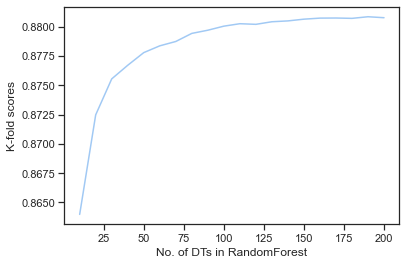

In [111]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [120]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [200,210,215,220,225],
            'max_depth': [20,25,30,35],
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=4)
model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'n_estimators': [200, 210, 215, 220, 225]})

In [121]:
model.best_params_

{'max_depth': 25, 'n_estimators': 220}

In [122]:
model.best_score_

0.8824985970475459

In [123]:
best_model_rf = model.best_estimator_

In [124]:
best_model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=220)

In [257]:
y_pred = best_model_rf.predict(x_test)

In [258]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
rf_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
rf_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rf_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.8868913723182387
Adj_R2 : 0.8864366642672568
Model Accuracy: 88.68913723182386%
mae : 92653.27499246053
mse : 13865554648.03864
rmse : 117752.08978204438


### INTERPRETATION
R2Score and Adj_R2,which are .886 which shows our model is a very good fit for the data and it can accurately predict the independ variable

Overall we have a model with a model accuracy of 88.68% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is a well fitted model for predictiong the house price with the significant variables.

## ADABOOST

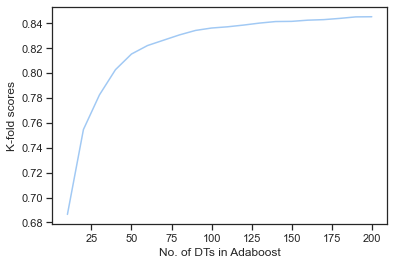

In [127]:
from sklearn.ensemble import AdaBoostRegressor

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  x_train,y_train,cv=4).mean())
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [130]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [200,210,215,220,225,230],
            'base_estimator': [DecisionTreeRegressor(max_depth=20,random_state=0),
                               DecisionTreeRegressor(max_depth=25,random_state=0),
                               DecisionTreeRegressor(max_depth=30,random_state=0),
                               DecisionTreeRegressor(max_depth=35,random_state=0),
                               DecisionTreeRegressor(max_depth=45,random_state=0)],
            'learning_rate': [0.1,0.001,0.5]
        }
model = GridSearchCV(AdaBoostRegressor(), params,cv=4)
model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=20,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=25,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=30,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=35,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=45,
                                                                  random_state=0)],
                         'learning_rate': [0.1, 0.001, 0.5],
                         'n_estimators': [200, 210, 215, 220, 225, 230]})

In [131]:
model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=35, random_state=0),
 'learning_rate': 0.5,
 'n_estimators': 220}

In [132]:
best_model_ab = model.best_estimator_

In [260]:
y_pred = best_model_ab.predict(x_test)

In [261]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
ab_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
ab_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
ab_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.8786223751545474
Adj_R2 : 0.8781344249039125
Model Accuracy: 87.86223751545475%
mae : 96625.55115633112
mse : 14879219426.823017
rmse : 121980.40591350324


### INTERPRETATION

R2Score and Adj_R2,which are .878 which shows our model is a very good fit for the data and it can accurately predict the independ variable

Overall we have a model with a model accuracy of 87.86% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is a well fitted model for predictiong the house price with the significant variables.

### MODEL COMPARISON

In [262]:
listmodel=['Linear Regression','KNN','SVR','RandomForest','ADABOOST']

In [263]:
LIST_R2=[lr_r2,knn_r2,svr_r2,rf_r2,ab_r2]

In [264]:
LIST_ADJR2=[lr_adjr2,knn_adjr2,svr_adjr2,rf_adjr2,ab_adjr2]

In [265]:
LIST_RMSE=[lr_rmse,knn_rmse,svr_rmse,rf_rmse,ab_rmse]

In [266]:
LIST_ACC=[lr_r2*100,knn_r2*100,svr_r2*100,rf_r2*100,ab_r2*100]

In [284]:
data1 = pd.DataFrame(listmodel, columns=["MODEL"])
data2= pd.DataFrame(LIST_R2, columns=["R2"])
data3=pd.DataFrame(LIST_ADJR2, columns=["ADj_R2"])
data4=pd.DataFrame(LIST_RMSE, columns=["RMSE"])
data5=pd.DataFrame(LIST_ACC, columns=["ACCURACY SCORE"])
data6=pd.concat([data1,data5],axis=1)
model_strength=pd.concat([data1,data2,data3,data4,data5],axis=1)
#print(model_strength)
print(model_strength.sort_values(by=['ACCURACY SCORE'],ascending=False))

               MODEL        R2    ADj_R2           RMSE  ACCURACY SCORE
0  Linear Regression  0.918367  0.918039  100035.370063       91.836702
3       RandomForest  0.886891  0.886437  117752.089782       88.689137
2                SVR  0.878622  0.878134  121980.405914       87.862238
4           ADABOOST  0.878622  0.878134  121980.405914       87.862238
1                KNN  0.583860  0.582187  225860.617834       58.385995


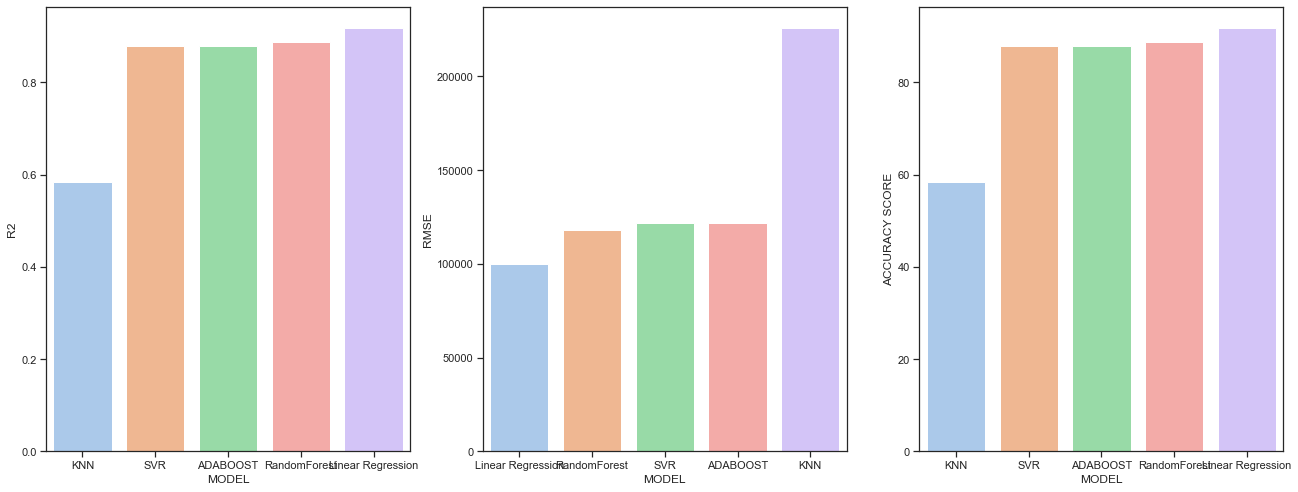

In [285]:
plt.figure(figsize=(30, 18))
plt.subplot(2,4,1)
sns.barplot(x ='MODEL' , y = 'R2', data = model_strength,order=model_strength.sort_values('R2').MODEL)
plt.subplot(2,4,2)
sns.barplot(x='MODEL',y='RMSE', data = model_strength,order=model_strength.sort_values('RMSE').MODEL)
plt.subplot(2,4,3)
sns.barplot(x='MODEL',y='ACCURACY SCORE', data = model_strength,order=model_strength.sort_values('ACCURACY SCORE').MODEL)

plt.show()

## CONCLUSION

From the above compariosn we can conclude that Linear Regression model best fits the given data to predict the house prices as it has low RMSE and high R2 and accuracy score compared to other models.The model with weakest performance is KNN